In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AB_NYC_2019.csv to AB_NYC_2019.csv


In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv("AB_NYC_2019.csv")

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.shape

(48895, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
# Fill missing 'reviews_per_month' with 0
df['reviews_per_month'].fillna(0, inplace=True)

# Drop rows with missing 'name' or 'host_name'
df.dropna(subset=['name', 'host_name'], inplace=True)

# Convert 'last_review' to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

/tmp/ipython-input-2499712793.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)


In [ ]:
print("Duplicates:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicates: 0


In [ ]:
df.columns = df.columns.str.lower().str.strip()

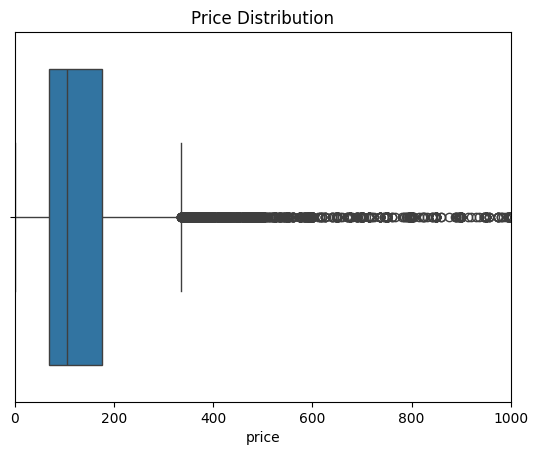

In [ ]:
# Visualize outliers
sns.boxplot(x=df['price'])
plt.xlim(0, 1000)  # limit for better visibility
plt.title("Price Distribution")
plt.show()

# Remove extreme outliers using IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['price'] >= lower) & (df['price'] <= upper)]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45887 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              45887 non-null  int64         
 1   name                            45887 non-null  object        
 2   host_id                         45887 non-null  int64         
 3   host_name                       45887 non-null  object        
 4   neighbourhood_group             45887 non-null  object        
 5   neighbourhood                   45887 non-null  object        
 6   latitude                        45887 non-null  float64       
 7   longitude                       45887 non-null  float64       
 8   room_type                       45887 non-null  object        
 9   price                           45887 non-null  int64         
 10  minimum_nights                  45887 non-null  int64         
 11  number_

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.588700e+04,4.588700e+04,45887.000000,45887.000000,45887.000000,45887.000000,45887.000000,36889,45887.000000,45887.000000,45887.000000
mean,1.890467e+07,6.633702e+07,40.728479,-73.950734,119.970907,6.940985,23.941225,2018-10-02 23:36:37.045189632,1.107956,6.643842,109.402859
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,2011-03-28 00:00:00,0.000000,1.000000,0.000000
25%,9.445691e+06,7.719674e+06,40.689230,-73.981925,65.000000,1.000000,1.000000,2018-07-03 00:00:00,0.050000,1.000000,0.000000
50%,1.953052e+07,3.028359e+07,40.721770,-73.954370,100.000000,2.000000,5.000000,2019-05-19 00:00:00,0.380000,1.000000,40.000000
75%,2.891607e+07,1.055431e+08,40.763385,-73.934325,159.000000,5.000000,24.000000,2019-06-23 00:00:00,1.620000,2.000000,217.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,334.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.091919e+07,7.757072e+07,0.055329,0.046474,68.145438,19.864844,45.314776,NaN,1.612643,31.019948,130.270561


In [ ]:
df.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
df.to_csv("AB_NYC_2019_cleaned.csv", index=False)